In [15]:
import os
config = !echo ${HOME}/.ecohydro.cfg
lib = !echo /usr/lib/grass64/lib:$LD_LIBRARY_PATH
os.environ['ECOHYDROLIB_CFG'] = config[0]
os.environ['LD_LIBRARY_PATH'] = lib[0]

In [16]:
!rm -rf test/
!mkdir test

In [17]:
!GetNHDStreamflowGageIdentifiersAndLocation.py -p test -g 01589312

Geting identifiers and location via NHDPlus webservice...done


In [18]:
!GetCatchmentShapefileForNHDStreamflowGage.py -p test --overwrite

Geting catchment area draining through gage using NHDPlus webservice...done


In [19]:
!GetBoundingboxFromStudyareaShapefile.py -p test

In [20]:
!GetUSGSDEMForBoundingbox.py -p test

0 .. 10 .. 20 .. 30 .. 40 .. 50 .. 60 .. 70 .. 80 .. 90 .. 100 - Done


In [21]:
!GetUSGSNLCDForDEMExtent.py -p test

In [22]:
!GetSSURGOFeaturesForBoundingbox.py -p test

Fetching SSURGO data for tile 1 of 1, bbox: -76.769782_39.27361_-76.717498_39.326008
Computed derived attribute drnWatCont = porosity - fieldCap
Converting SSURGO features from GeoJSON to shapefile format...Warning 6: Normalized/laundered field name: 'brockdepmin' to 'brockdepmi'
Warning 6: Normalized/laundered field name: 'drclasswettest' to 'drclasswet'
Warning 6: Normalized/laundered field name: 'slopegradwta' to 'slopegradw'
Warning 6: Normalized/laundered field name: 'urbrecptwta' to 'urbrecptwt'
Warning 6: Normalized/laundered field name: 'flodfreqdcd' to 'flodfreqdc'
Warning 6: Normalized/laundered field name: 'mupolygonkey' to 'mupolygonk'
Warning 6: Normalized/laundered field name: 'pondfreqprs' to 'pondfreqpr'
Warning 6: Normalized/laundered field name: 'wtdepannmin' to 'wtdepannmi'
Warning 6: Normalized/laundered field name: 'wtdepaprjunmin' to 'wtdepaprju'
Warning 6: Normalized/laundered field name: 'urbrecptdcd' to 'urbrecptdc'
Warning 6: Normalized/laundered field name: '

In [39]:
!GenerateSoilPropertyRastersFromSSURGO.py -p test

Generating soil property maps by rasterizing SURGO features...done


In [40]:
!RegisterRaster.py -p test -t lai -r ~/static_lai-01589312.tif -b "Brian Miles <brian_miles@unc.edu>" --force

Resampling lai raster from EPSG:26918 to EPSG:32618, spatial
resolution (5.00, 5.00) to (30.00, 30.00)...done


In [41]:
!CreateGRASSLocationFromDEM.py -p test -d "RHESSys model for Dead Run 5 watershed near Catonsville, MD"

Projection of input dataset and current location appear to match
   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
r.in.gdal complete. Raster map <dem> created.
Default region for this location updated
Region for the current mapset updated


In [42]:
!ImportRHESSysSource.py -p test

Cloning into '/home/ubuntu/test/rhessys/db/ParamDB'...
remote: Counting objects: 3426, done.
remote: Total 3426 (delta 0), reused 0 (delta 0), pack-reused 3426
Receiving objects: 100% (3426/3426), 2.17 MiB | 0 bytes/s, done.
Resolving deltas: 100% (1841/1841), done.
Checking connectivity... done.
Cloning into '/home/ubuntu/test/rhessys/src'...
remote: Counting objects: 9353, done.
remote: Total 9353 (delta 0), reused 0 (delta 0), pack-reused 9353
Receiving objects: 100% (9353/9353), 79.78 MiB | 31.35 MiB/s, done.
Resolving deltas: 100% (6583/6583), done.
Checking connectivity... done.
Note: checking out 'RHESSys-5.18.2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  gi

In [43]:
!ImportClimateData.py -p test -s ~/clim

Importing climate data from /home/ubuntu/clim...
	Station 'bwi'

	Station 'mcd'
done


In [44]:
!GenerateBaseStationMap.py -p test -b ~/dummy_stations1.txt

Scanning input for column types...
Maximum input row length: 35
Maximum number of columns: 4
Minimum number of columns: 4
         driver: dbf
         database: $GISDBASE/$LOCATION_NAME/$MAPSET/dbf/
Column: 1 type: integer
Column: 2 type: double
Column: 3 type: double
Column: 4 type: string length: 3
Importing points...
 100%
Populating table...
Building topology for vector map <basestation_points>...
Registering primitives...
1 primitives registered
1 vertices registered
Building areas...
 100%
0 areas built
0 isles built
Attaching islands...
Attaching centroids...
 100%
Number of nodes: 1
Number of primitives: 1
Number of points: 1
Number of lines: 0
Number of boundaries: 0
Number of centroids: 0
Number of areas: 0
Number of isles: 0
v.in.ascii complete.
Reading sites...
Voronoi triangulation...
Building topology for vector map <basestation_areas>...
Registering primitives...
0 primitives registered
0 vertices registered
Number of nodes: 0
Number of primitives: 0
Num

In [45]:
!DelineateWatershed.py -p test -t 500 -a 1.5

Using raster named 'dem' to calculate flow direction map
SECTION 1a (of 4): Initiating Memory.
SECTION 1b (of 4): Determining Offmap Flow.
   0%   4%   8%  12%  16%  20%  24%  28%  32%  36%  40%  44%  48%  52%  56%  60%  64%  68%  72%  76%  80%  84%  88%  92%  96% 100%
SECTION 2: A * Search.
   0%   2%   4%   6%   8%  10%  12%  14%  16%  18%  20%  22%  24%  26%  28%  30%  32%  34%  36%  38%  40%  42%  44%  46%  48%  50%  52%  54%  56%  58%  60%  62%  64%  66%  68%  70%  72%  74%  76%  78%  80%  82%  84%  86%  88%  90%  92%  94%  96%  98% 100%
SECTION 3: Accumulating Surface Flow with SFD.
   1%   3%

In [46]:
!GeneratePatchMap.py -p test -t grid

Generating gridded patch map...
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
done


In [47]:
!GenerateSoilTextureMap.py -p test

Removing raster <MASK>
Generating soil texture map from percent sand and clay maps...Projection of input dataset and current location appear to match
   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
r.in.gdal complete. Raster map <soil_pctsand> created.
Projection of input dataset and current location appear to match
   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
r.in.gdal complete. Raster map <soil_pctclay> cr

In [48]:
!ImportRasterMapIntoGRASS.py -p test -t lai -m nearest

Importing lai raster...Projection of input dataset and current location appear to match
   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
r.in.gdal complete. Raster map <lai> created.
Resampling lai raster using method nearest...
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
done


In [49]:
!ImportRasterMapIntoGRASS.py -p test -t landcover -m nearest

Importing landcover raster...Projection of input dataset and current location appear to match
   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
r.in.gdal complete. Raster map <landcover> created.
Resampling landcover raster using method nearest...
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
done


In [50]:
!RegisterLandcoverReclassRules.py -p test -k

Importing landcover reclass rules from
/usr/local/rhessysworkflows/etc/NLCD2011 ...done


In [51]:
!GenerateLandcoverMaps.py -p test

   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
Writing stratum definition files to /home/ubuntu/test/rhessys/defs
stratum 'evergreen' has dn 1
stratum 'deciduous' has dn 2
stratum 'grass' has dn 3
stratum 'nonveg' has dn 4
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
Writing landuse definition files to /home/ubuntu/test/rhessys/defs
landuse 'undeveloped' has dn 2
landuse 'agriculture' h

In [52]:
!GenerateWorldTemplate.py -p test

   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
Getting parameter definition files for basin, hillslope, and zone...done

Finding definition files in /home/ubuntu/test/rhessys/defs...done

Generating template from template template /home/ubuntu/test/rhessys/db/ParamDB/templates/template.template...   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
   0%   3%   6%   9%  12%

In [53]:
!CreateWorldfile.py -p test -v

/home/ubuntu/test/rhessys/bin/g2w -t /home/ubuntu/test/rhessys/templates/template -w /home/ubuntu/test/rhessys/worldfiles/world_init

Running grass2world from /home/ubuntu/test/rhessys/bin...
 Determining r.stats command in rat
executing command - r.stats -i -a input=basin,basin fs=space output=/home/ubuntu/test/GRASSData/default/PERMANENT/.tmp/rhessys/14783.0

executing command - sed 's/*/0/g' <  /home/ubuntu/test/GRASSData/default/PERMANENT/.tmp/rhessys/14783.0 > tmp 

 Determining r.stats command in rat
executing command - r.stats -i -a input=basin,basin,hillslopes fs=space output=/home/ubuntu/test/GRASSData/default/PERMANENT/.tmp/rhessys/14793.0

executing command - sed 's/*/0/g' <  /home/ubuntu/test/GRASSData/default/PERMANENT/.tmp/rhessys/14793.0 > tmp 

 Determining r.stats command in rat
executing command - r.stats -i -a input=basin,basin,hillslopes,patch fs=space output=/home/ubuntu/test/GRASSData/default/PERMANENT/.tmp/rhessys/14803.0

executing command - sed 's/*/0/g' <  /ho

In [54]:
!CreateFlowtable.py -p test --routeRoads

Using raster named 'dem' to calculate flow direction map
Running createflowpaths (this may take a few minutes)...
Finished creating flowtable


In [55]:
!RunLAIRead.py -p test -v

First climate station in worldfile: /home/ubuntu/test/rhessys/clim/bwi.base
	start date: 1990-09-01 01:00:00, end date: 2010-10-01 01:00:00
Running lairead to generate redefine worldfile...
Converting lai raster map
Building patch table...

 Initializing flowtable
 searching 250 rows and 217 cols
 Total number of patches is 1795number of vegetation types from allometric table: 8


 Linking vegetation and allometry...
Found world file header /home/ubuntu/test/rhessys/worldfiles/world_init.hdr

 Level 1 number children 2
 Level 2 number children 1128
 Level 3 number children 1
 Level 4 number children 1
 Level 3 number children 1
 Level 4 number children 1
 Level 3 number children 1
 Level 4 number children 1
 Level 3 number children 1
 Level 4 number children 1
 Level 3 number children 1
 Level 4 number children 1
 Level 3 number children 1
 Level 4 number children 1
 Level 3 number children 1
 Level 4 number children 1
 Level 3 number children 1
 Level 4 number children 1
 Level 3 numb

In [60]:
!RunCmd.py -p test echo "2008 10 1 1 print_daily_on" > test/rhessys/tecfiles/tec_daily.txt

In [23]:
!RunModel.py -v -p test -d "Test model run" --basin -pre test -st 2008 1 1 1 -ed 2010 10 1 1 -w world -t tec_daily.txt -r world.flow -- -s 0.07041256017 133.552915269 1.81282283058 -sv 4.12459677088 78.3440566535 -gw 0.00736592779294 0.340346799457

Metadata in project directory /home/ubuntu/test does not contain a RHESSys directory


In [62]:
!RHESSysPlot.py --plottype standard -o ~/DR5_discharge_WY2008-2012.txt -d ~/test/rhessys/output/test/rhessys_basin.daily -c streamflow --secondaryData ~/test/rhessys/output/test/rhessys_basin.daily --secondaryColumn precip --secondaryLabel "Rainfall (mm/day)" -t "DR5 streamflow" -l "Test simulation" -f test_plot --figureX 8 --figureY 3 -y "Streamflow (mm/day)" --color magenta

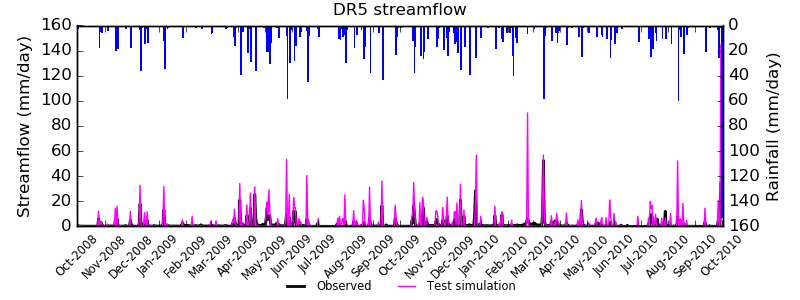

In [63]:
from IPython.display import Image
Image(filename='standard_test_plot.png')

In [14]:
from folium.folium import Map
from IPython.display import HTML


def inline_map(m):
    if isinstance(m, Map):
        m._build_map()
        srcdoc = m.HTML.replace('"', '&quot;')
        embed = HTML('<iframe srcdoc="{srcdoc}" '
                     'style="width: 100%; height: 500px; '
                     'border: none"></iframe>'.format(srcdoc=srcdoc))
    else:
        raise ValueError('{!r} is not a folium Map instance.')
    return embed

width, height = 650, 450
m = Map(width=width, height=height, location=[39, -77.6], zoom_start=7)


m.add_wms_layer(wms_name="NED10masdkfad",
                wms_url="http://141.142.168.40:8080/geoserver/TopoLens/wms?",
                wms_format="image/png",
                wms_layers='TopoLens:DEM_State_MD_4269')

m.add_layers_to_map()

inline_map(m)

In [13]:
%%bash
df

Filesystem                                                       1K-blocks         Used     Available Use% Mounted on
udev                                                               2018952           12       2018940   1% /dev
tmpfs                                                               404832          364        404468   1% /run
/dev/vda1                                                         41251136      3394076      36148620   9% /
none                                                                     4            0             4   0% /sys/fs/cgroup
none                                                                  5120            0          5120   0% /run/lock
none                                                               2024140            0       2024140   0% /run/shm
none                                                                102400            0        102400   0% /run/user
cg-gpfs03.ncsa.illinois.edu:/gpfs/largeblockFS/projects/nfie 4240548583424 76